### Question 1: How are the type of real estate distributed by district in Ho Chi Minh city? 

For this question, we are investigating the real estate product type (ex. `Căn hộ chung cư`, `Văn phòng`...) and how they are related to districts in Ho Chi Minh city and vice versa. Although at first the question seems quite simple, it becomes quite complex as we dig deeper into the data.

In [1]:
# import necessary library
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

Let's see what we have in our data.

In [2]:
data = pd.read_csv('processed_rent_data.csv', index_col=0)
data

,Rent type,Post date,Area,Price,Bedrooms,Toilets,Furniture,Floors,District
0,Căn hộ chung cư,2023-12-07,50.0,17000000.0,1.0,1.0,NaN,NaN,2
1,Căn hộ chung cư,2023-12-05,50.0,17000000.0,1.0,1.0,NaN,NaN,2
2,Căn hộ chung cư,2023-12-02,77.0,23000000.0,2.0,2.0,NaN,NaN,2
3,Căn hộ chung cư,2023-12-02,50.0,17000000.0,1.0,1.0,NaN,NaN,2
4,Căn hộ chung cư,2023-12-05,52.0,16900000.0,1.0,1.0,cơ bản,NaN,2
...,...,...,...,...,...,...,...,...,...
40594,"Kho, nhà xưởng, đất",2023-11-08,8000.0,100000000.0,NaN,NaN,NaN,NaN,bình tân
40595,"Cửa hàng, ki ốt",2023-11-08,160.0,130000000.0,NaN,NaN,NaN,NaN,5
40596,"Kho, nhà xưởng, đất",2023-11-08,1350.0,22000000.0,NaN,NaN,NaN,NaN,hóc môn
40597,"Kho, nhà xưởng, đất",2023-11-08,17000.0,20000000.0,NaN,NaN,NaN,NaN,bình tân


#### 1.1 How are the number of real estate for rent distributed across districts in Ho Chi Minh city?

In other word, we are asking:
- Which districts has the most real estate product for sale? 
- Which districts has the least real estate product for sale? 

=> **How big** is **the renting market** in **each districts** and how are they compared to each other.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


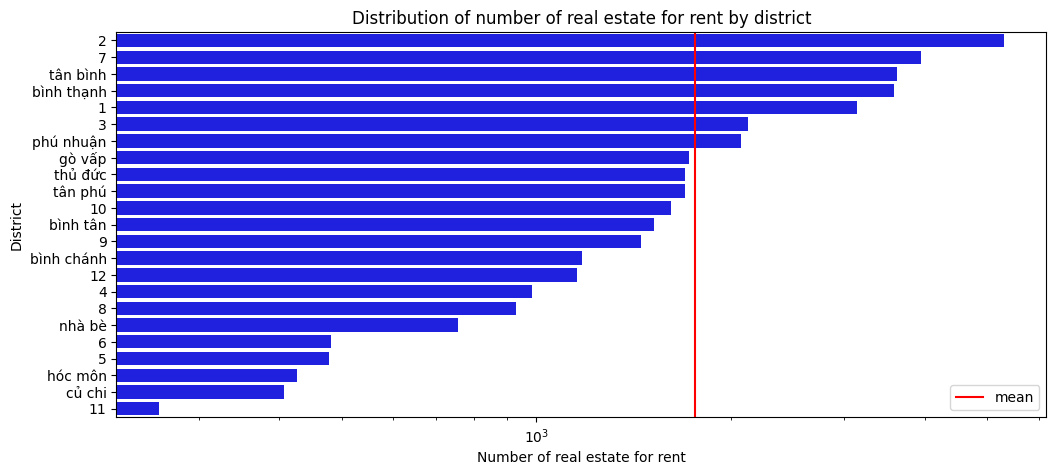

In [157]:
rent_district_count = data.groupby('District')['Rent type'].agg(count='count').reset_index()

plt.pyplot.figure(figsize=(12, 5))
ax = sns.barplot(x='count', y='District', data=rent_district_count.sort_values(by='count', ascending=False), color='blue')
ax.set_xscale("log")
ax.set(title='Distribution of number of real estate for rent by district', xlabel='Number of real estate for rent')
ax.axvline(x = np.mean(rent_district_count['count']), color='red', label='mean')
ax.legend()

Looking at the graph, we can divide the districts into 2 groups: those with number of property for rent over average, and those under average. There are 6 over average districts: `District 2`, `District 7`, `Tân Bình District`, `Bình Thạnh District`, `1st District`, `District 3` and `Phú Nhuận District`. With in the over average district, `District 2` is at the top with more than 5000 rental property on sale, `District 7` at second place with around 4000 and `Tân Bình District` at 3rd place at around 3900.

The gap between the number of rental property, and subsequenly the scale of the real estate rental property market in each districts differ drastically. Even in the over average group there is a big gap - `District 2` doubles `Phú Nhuận District`.  

#### 1.2 How are the number of real estate for rent distributed across rent type in Ho Chi Minh city?

In other word, we are asking:
- Which property for rent has the most real estate product for sale? 
- Which property for rent has the least real estate product for sale? 

=> **How big** is **the renting market** in **each property type** and how are they compared to each other.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


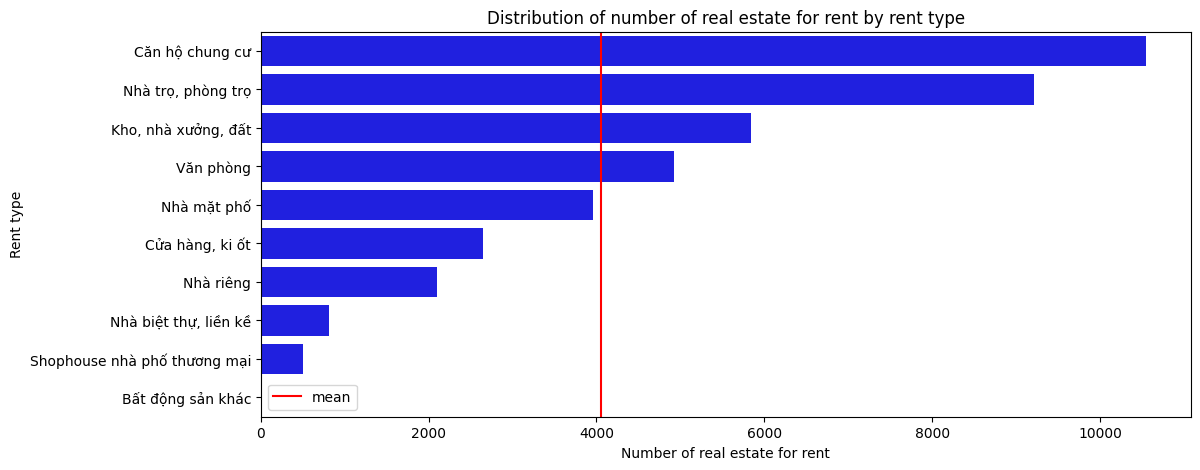

In [163]:
rent_type_count = data.groupby('Rent type')['District'].agg(count='count').reset_index()

plt.pyplot.figure(figsize=(12, 5))
ax = sns.barplot(x='count', y='Rent type', data=rent_type_count.sort_values(by='count', ascending=False), color='blue')
# ax.set_xscale("log")
ax.set(title='Distribution of number of real estate for rent by rent type', xlabel='Number of real estate for rent')
ax.axvline(x = np.mean(rent_type_count['count']), color='red', label='mean')
ax.legend()

Again, we can divide the property type into 2 groups: those with number of property for rent over average, and those under average. The top 3 most popular property type are: `Căn hộ chung cư`, `Nhà trọ, phòng trọ` and `Kho, nhà xưởng, đât`. The gaps between the number of property are also very large, with `Căn hộ chung cư` is more than 5 times `Nhà riêng`'s property for rent.

### 1.3 What is the distribution of number of property for rent by district and property type?

In other word, we are asking: 
- What is the most popular rental property type in Ho Chi Minh city? 
- Where are the most popular rental property type distributed in Ho Chi Minh city?

=> What is the popularity of each rental property type in Ho Chi Minh city and where are they?

[Text(0.5, 1.0, 'Distribution of number of real estate for rent by district and rent type')]

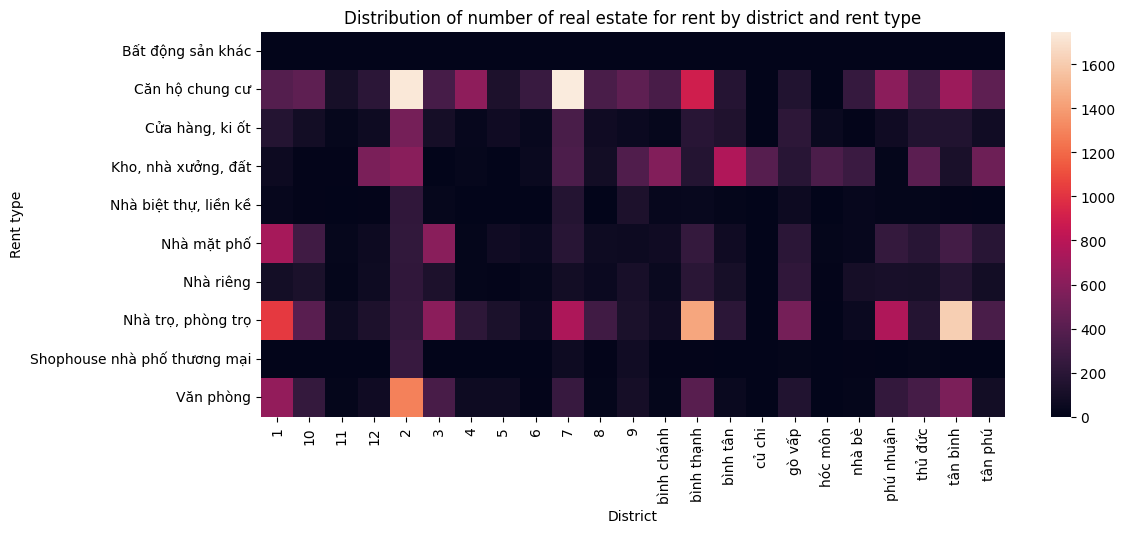

In [165]:
rent_district_count_by_type = data.groupby(['District', 'Rent type'])['Rent type'].agg(count='count').reset_index().pivot(index='District', columns='Rent type', values='count').fillna(0)

plt.pyplot.figure(figsize=(12, 5))
sns.heatmap(rent_district_count_by_type.T).set(title='Distribution of number of real estate for rent by district and rent type')

Looking at the graph makes the popularity of some property type much clearer. Most of the property types are sparse and few, with make up the solid color pallete that populate most of the graph. Among that, we can see that some property type are quite popular, and with some especially popular in specific districts, and other are distributed more evenly across the board.

Take the 4 most popular property type. 
- `Căn hộ chung cư`: Mostly concentrated in `District 2` and `District 7`. Other than that, it's also quite popular in `Bình Thạnh District`, `District 4`, `Phú Nhuận District` and `Tân Bình District`.
- `Nhà trọ, phòng trọ`: Mostly concentrated in `Tân Bình District` and `Bình Thạnh District`. Pther than that, it's also quite popular in `1st District`, `District 3`, `District 7`, `Gò Vấp District` and `Phú Nhuận District`.
- `Kho, nhà xưởng, đất`: Not concentrated in any district in particular but we can see that it's very unpopular in central districts like `1st District` and `District 5`. It's quite popular in `District 1`, `District 12`, `Bình Chánh District` and `Bình Tân District`.
- `Văn phòng`: Mostly concentrated in `District 2`, though it's also quite popular in `1st District` and `Tân Bình District`.


### 1.4 What is the distribution of property type by district ratio?

In other word, we're asking:
- In percentage, for each property type, where are they concentrated the most?
- In percentage, for each property type, where are they concentrated the least?

=> How popular is each property type for rent is in every district?

[Text(0.5, 1.0, 'Distribution of real estate in districts by type by percentage')]

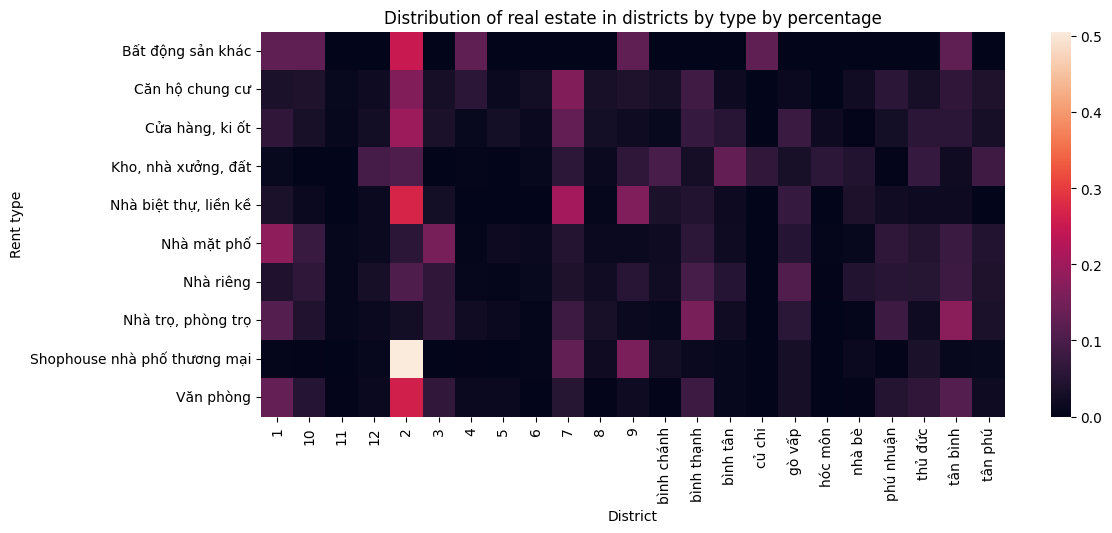

In [164]:
# rent_district_count.set_index('District', inplace=True)
rent_type_district_count = data.groupby('Rent type')['District'].agg(count='count').reset_index().set_index('Rent type')

def get_ratio(x):
    return x/rent_type_district_count.loc[x.name].values
rent_district_count_by_type_percentage = rent_district_count_by_type.T.apply(get_ratio, axis=1)

plt.pyplot.figure(figsize=(12,5))
sns.heatmap(rent_district_count_by_type_percentage).set(title='Distribution of real estate in districts by type by percentage')

Looking at the graph, we can see that some districts are very popular, while others are not so much. Some popular districts are `District 2`, `District 7`, `1st District` and `District 9`. 

Let's go through the property type one by one for better view of the situation in each:
- `Căn hộ chung cư`: Popular in `District 2`, `Distric 7`, `Bình Thạnh District`.
- `Cửa hàng, ki ốt`: Popular in `District 2`, `Distric 7`.
- `Kho, nhà xưởng, đất`: Popular in `Bình Tân District`, `Bình Chánh District`.
- `Nhà biệt thự, liền kề`: Popular in `District 2`, `District 7`, `District 9`.
- `Nhà mặt phố`: Popular in `1st Dítrict`, `District 3`.
- `Nhà riêng`: Mostly spread out but quite popular in `Bình Thạnh District`, `Gò Vấp District` and `District 2`.
- `Nhà trọ, phòng trọ`: Popular in `Bình Thạnh District`, `Tân Bình District` and `1st District`.
- `Shophouse, nhà phố thương mại`: Very popular in `District 2`. Quite popular in `District 7` and `District 9`.
- `Văn phòng`: Very popluar in `District 2`. Quite popular in `1st District` and `Tân Bình District`.
- `Bất động sản khảc`: Very popular in `District 2`.

### 1.5 What is the distribution of district by property type ratio?

In other word, we are asking:
- In percentage, what is the distribution of property type in each district?

=> How popular is each district by property type?

[Text(0.5, 1.0, 'Distribution of real state type in district by percentage')]

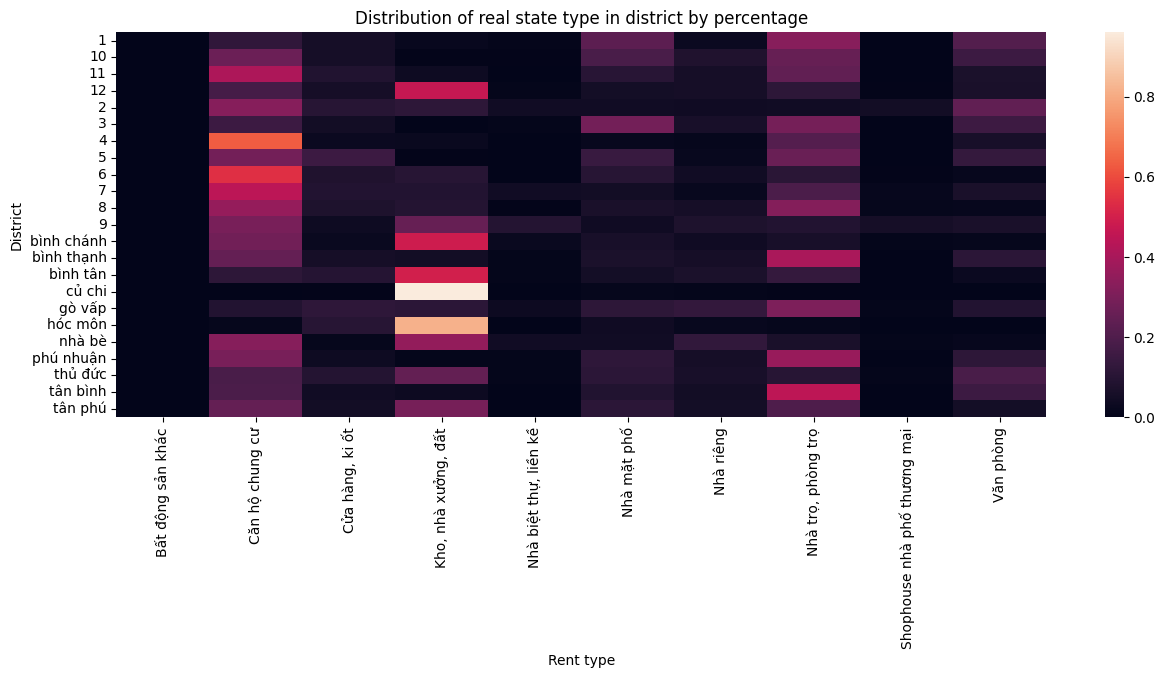

In [168]:
# rent_district_count.set_index('District', inplace=True)
def get_ratio(x):
    return x/rent_district_count.loc[x.name].values
rent_district_count_by_type_percentage = rent_district_count_by_type.apply(get_ratio, axis=1)

plt.pyplot.figure(figsize=(15,5))
sns.heatmap(rent_district_count_by_type_percentage).set(title='Distribution of real state type in district by percentage')

Let's go through the District one by one for better view of the situation in each:
- `1st District`: Popular with `Nhà mặt phố, Nhà trọ, phòng trọ, Văn phòng`.
- `District 2`: Popular with `Căn hộ chung cư, Văn phòng`.
- `District 3`: Popular with `Nhà mặt phố, Nhà trọ, phòng trọ`.
- `District 4`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ`.
- `District 5`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ, Cửa hàng, ki ốt`.
- `District 6`: Popular with `Căn hộ chung cư`.
- `District 7`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ`.
- `District 8`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ`.
- `District 9`: Popular with `Căn hộ chung cư, Kho, nhà xưởng, đất`.
- `District 10`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ, Nhà mặt phố`.
- `District 11`:Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ, Nhà mặt phố`.
- `District 12`: Popular with `Kho, nhà xưởng, đất, Căn hộ chung cư`.
- `Bình Chánh District`: Popular with `Kho, nhà xưởng, đất, Căn hộ chung cư`.
- `Bình Thạnh District`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ`.
- `Củ Chi District`: Popular with `Kho, nhà xưởng, đất, Phòng trọ, nhà trọ`.
- `Gò Vấp District`: Popular with `Phòng trọ, nhà trọ`.
- `Bình Tân District`: Popular with `Kho, nhà xưởng, đất`.
- `Nhà Bè District`: Popular with `Căn hộ chung cư, Kho, nhà xưởng, đất`.
- `Hóc Môn District`: Popular with `Kho, nhà xưởng, đất`.
- `Nhà Bè District`: Popular with `Căn hộ chung cư, Kho, nhà xưởng, đất`.
- `Phú Nhuận District`: Popular with `Căn hộ chung cư, Phòng trọ, nhà trọ`.
- `Thủ Đức District`: Popular with `Căn hộ chung cư, Kho, nhà xưởng, đất`.
- `Tân Bình District`: Popular with `Nhà trọ, phòng trọ`.
- `Tân Phú District`: Popular with `Căn hộ chung cư, Kho, nhà xưởng, đất, Nhà trọ, phòng trọ`.